In [1]:
# ========================================================================
#                   Python Data Visualization Mastery
# ========================================================================
#    Module: Matplotlib - Object-Oriented Interface
#    Topic: Mastering Figure and Axes Objects
#    
#    Description:
#    This notebook focuses on Matplotlib's object-oriented interface, providing
#    a more flexible and powerful approach to creating visualizations. We'll
#    explore the Figure and Axes objects, their methods, and how to create
#    complex, customized plots with explicit control over all elements.
#    
#    Contents:
#    1. Introduction to the Object-Oriented Interface
#    2. Understanding Figure and Axes Objects
#    3. Creating and Managing Subplots
#    4. Advanced Customization with Object Methods
#    5. Comparison with pyplot and When to Use Each Approach
#    
#    Author: Dr. Saad Laouadi
#    Date: February 2025
#    Version: 1.0
#    
# ========================================================================
#  ®Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

## 1. Introduction to the Object-Oriented Interface

%% [markdown]
While pyplot provides a convenient state-based interface, Matplotlib's object-oriented (OO) interface offers more explicit control and flexibility. The OO interface allows you to:

- Work with multiple figures and axes simultaneously with clear references
- Create complex layouts and custom visualizations
- Maintain better control over memory usage
- Build more maintainable code for applications and complex projects

In the object-oriented approach, you explicitly create Figure and Axes objects and call methods on them, rather than relying on pyplot's global state.

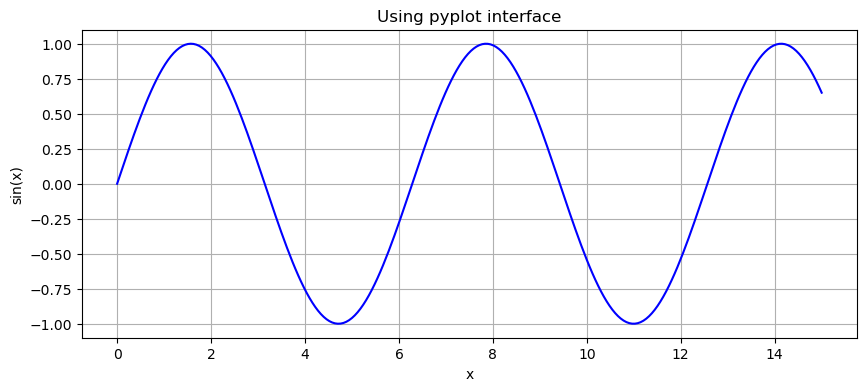

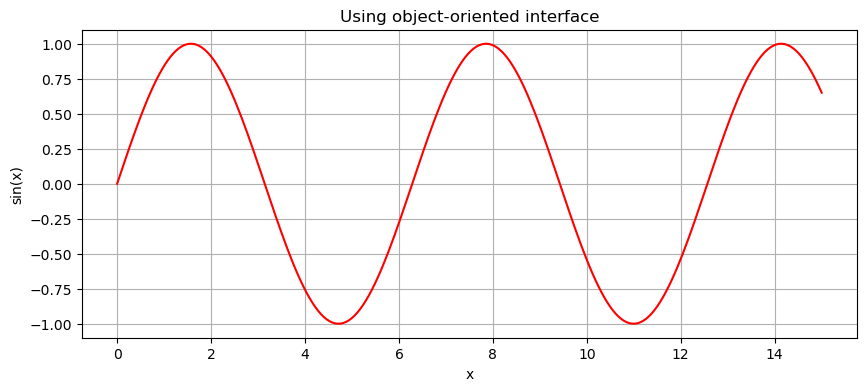

In [6]:
# %%
# Basic comparison of pyplot vs. object-oriented approaches

# Generate some sample data
x = np.linspace(0, 15, 250)
y = np.sin(x)

# Pyplot approach (for comparison)
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'b-')
plt.title('Using pyplot interface')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

# Object-oriented approach
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, 'r-')
ax.set_title('Using object-oriented interface')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.grid(True)
plt.show()

## 2. Understanding Figure and Axes Objects


### The Figure Object

The `Figure` is the top-level container that holds everything you see in a visualization. It represents the entire figure and has methods for managing:

- Size and DPI
- Background color and transparency
- Subplots and subplot arrangements
- Saving the finished visualization

### The Axes Object

`Axes` objects are where the actual plotting happens. An Axes represents a single plot (with x and y axes) and contains:

- Methods for all types of plots (plot, scatter, bar, etc.)
- Methods for setting axis properties, labels, and titles
- Methods for adding grids, legends, and annotations

A Figure can contain multiple Axes objects.

Figure type: <class 'matplotlib.figure.Figure'>
Axes type: <class 'matplotlib.axes._axes.Axes'>
Figure size in inches: [12.  6.]
Axes position: Bbox(x0=0.1, y0=0.1, x1=0.9, y1=0.9)


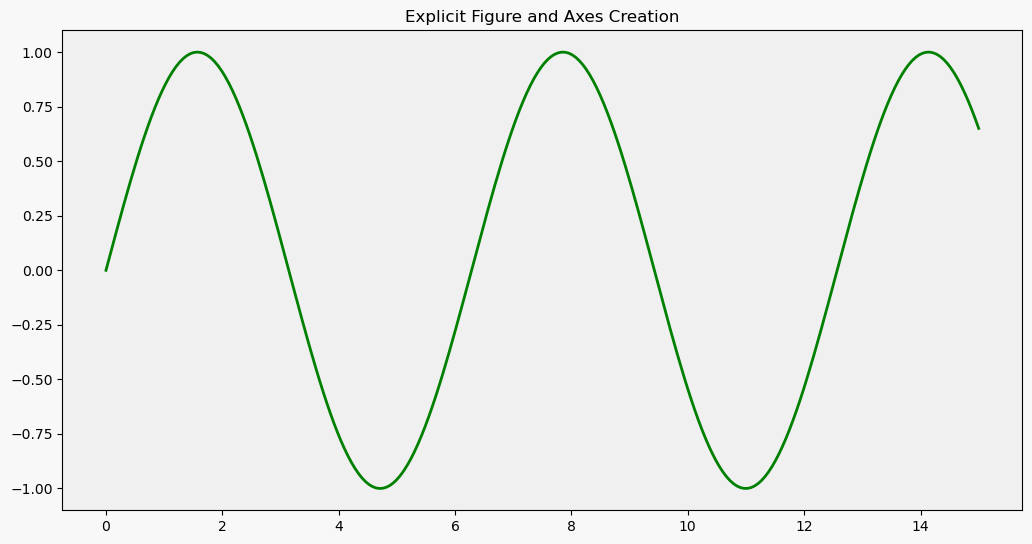

In [7]:
# Creating Figure and Axes objects explicitly
fig = plt.figure(figsize=(12, 6), facecolor='#f8f8f8')

# Create an Axes object at a specific position
# Parameters are: [left, bottom, width, height] in figure coordinates (0-1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot data on the Axes
ax.plot(x, y, 'g-', linewidth=2)
ax.set_title('Explicit Figure and Axes Creation')
ax.set_facecolor('#f0f0f0')

# Inspecting objects
print(f"Figure type: {type(fig)}")
print(f"Axes type: {type(ax)}")
print(f"Figure size in inches: {fig.get_size_inches()}")
print(f"Axes position: {ax.get_position()}")

plt.show()

%% [markdown]
### Key Methods of Figure Objects

Some of the most commonly used Figure methods include:

- `fig.add_subplot(rows, cols, index)`: Add a subplot at a specific position
- `fig.add_axes([left, bottom, width, height])`: Add axes at a specific position
- `fig.suptitle()`: Add a figure-level title
- `fig.savefig()`: Save the figure to a file
- `fig.set_size_inches()`: Set the figure size
- `fig.set_dpi()`: Set the figure resolution
- `fig.set_facecolor()`: Set the background color

### Key Methods of Axes Objects

Axes objects have numerous methods for creating and customizing plots:

- Plotting methods: `ax.plot()`, `ax.scatter()`, `ax.bar()`, etc.
- Customization methods: `ax.set_title()`, `ax.set_xlabel()`, `ax.set_xlim()`, etc.
- Grid and tick methods: `ax.grid()`, `ax.tick_params()`, `ax.set_xticks()`, etc.
- Annotation methods: `ax.annotate()`, `ax.text()`, etc.

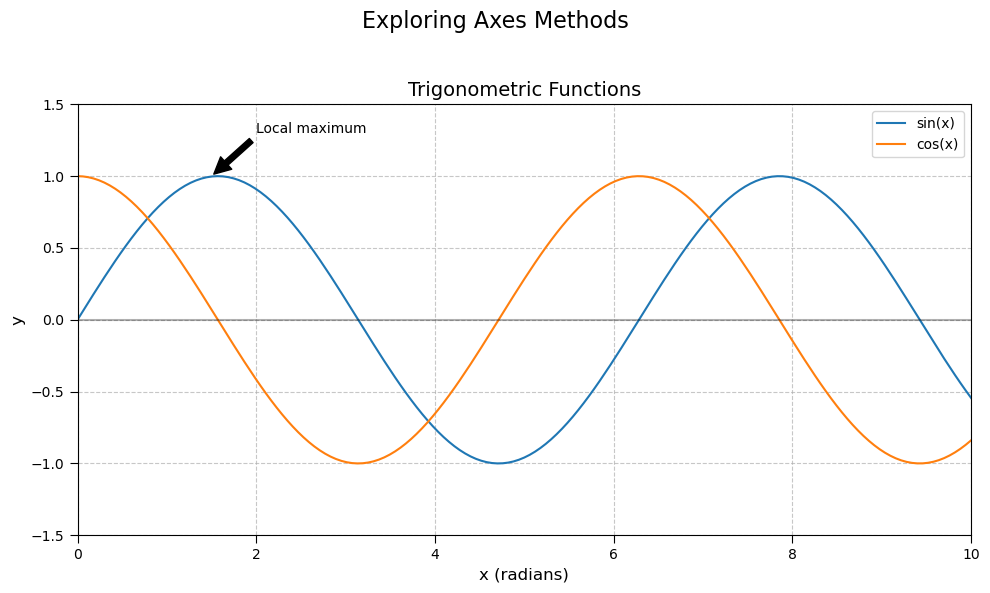

In [8]:
# Demonstrating key Figure and Axes methods
fig = plt.figure(figsize=(10, 6))

# Add a subplot
ax = fig.add_subplot(111)  # (rows, cols, index)

# Create plots
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')

# Customize the axes
ax.set_title('Trigonometric Functions', fontsize=14)
ax.set_xlabel('x (radians)', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

# Add a grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=10, direction='out', length=6)

# Add a legend
ax.legend(loc='upper right')

# Add annotations
ax.annotate('Local maximum', xy=(1.5, 1.0), xytext=(2, 1.3),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add a horizontal line
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Add a figure title
fig.suptitle('Exploring Axes Methods', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

%% [markdown]
## 3. Creating and Managing Subplots

%% [markdown]
One of the key advantages of the object-oriented interface is its ability to handle multiple subplots with explicit control. There are several ways to create subplots:

1. Using `plt.subplots()` (recommended for most cases)
2. Using `fig.add_subplot()` 
3. Using `fig.add_gridspec()` for complex layouts

### Creating Grid Layouts with plt.subplots()

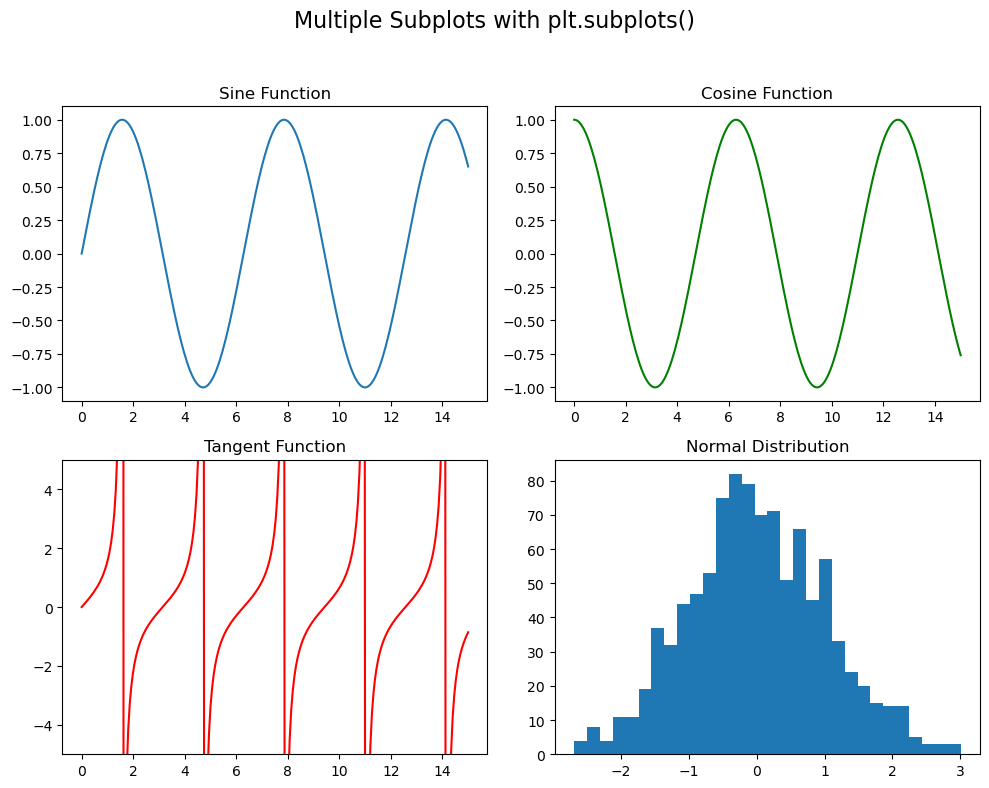

In [9]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# We can access each subplot by its index
axs[0, 0].plot(x, np.sin(x))
axs[0, 0].set_title('Sine Function')

axs[0, 1].plot(x, np.cos(x), 'g-')
axs[0, 1].set_title('Cosine Function')

axs[1, 0].plot(x, np.tan(x), 'r-')
axs[1, 0].set_title('Tangent Function')
axs[1, 0].set_ylim(-5, 5)  # Limit y-axis for tangent

# Create a histogram in the fourth subplot
axs[1, 1].hist(np.random.normal(0, 1, 1000), bins=30)
axs[1, 1].set_title('Normal Distribution')

# Add a shared title
fig.suptitle('Multiple Subplots with plt.subplots()', fontsize=16)

# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Creating Custom Subplot Layouts

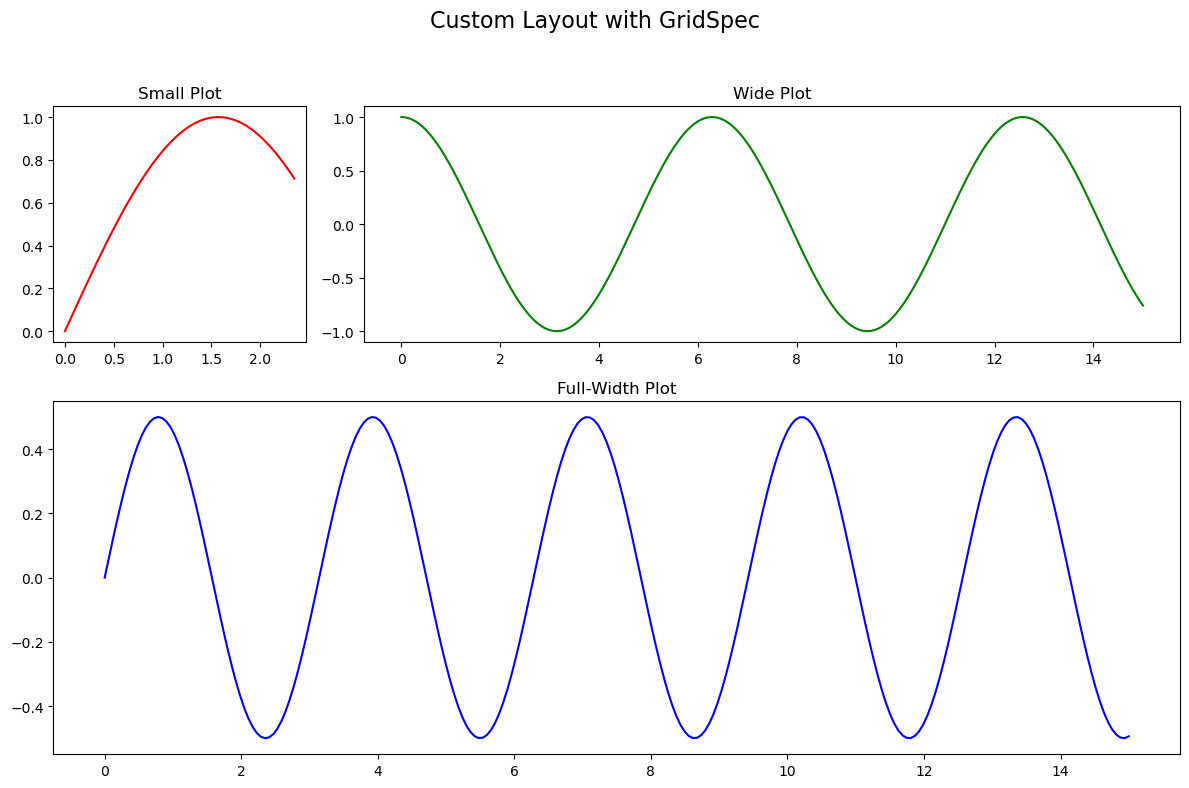

In [10]:
# Creating a custom layout with varying subplot sizes
fig = plt.figure(figsize=(12, 8))

# Create a 2x3 grid specification with custom width and height ratios
gs = fig.add_gridspec(2, 3, width_ratios=[1, 2, 1], height_ratios=[1, 1.5])

# Create subplots from the grid spec
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1:])  # Top-middle and top-right
ax3 = fig.add_subplot(gs[1, :])   # Entire bottom row

# Plot data in each subplot
ax1.plot(x[:40], np.sin(x[:40]), 'r-')
ax1.set_title('Small Plot')

ax2.plot(x, np.cos(x), 'g-')
ax2.set_title('Wide Plot')

ax3.plot(x, np.sin(x) * np.cos(x), 'b-')
ax3.set_title('Full-Width Plot')

fig.suptitle('Custom Layout with GridSpec', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Sharing Axes Between Subplots

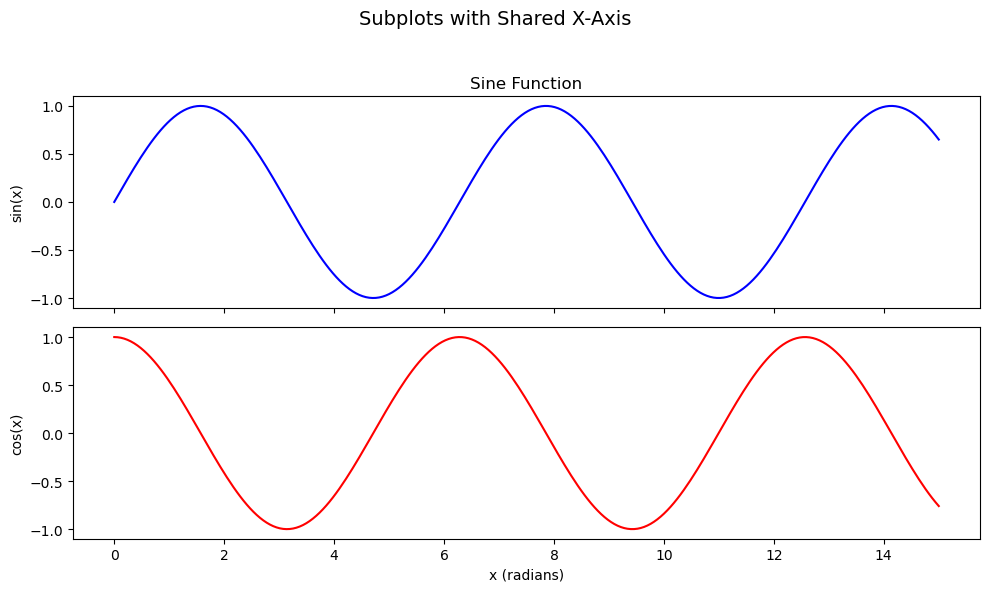

In [11]:
# Create subplots with shared axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot related data on both axes
ax1.plot(x, np.sin(x), 'b-')
ax1.set_title('Sine Function')
ax1.set_ylabel('sin(x)')

ax2.plot(x, np.cos(x), 'r-')
ax2.set_ylabel('cos(x)')
ax2.set_xlabel('x (radians)')

# Notice that x-axis label only appears on the bottom subplot
# and ticks/limits are automatically synchronized

fig.suptitle('Subplots with Shared X-Axis', fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 4. Advanced Customization with Object Methods

The object-oriented interface allows for precise control over every aspect of the visualization. Let's explore some advanced customization techniques.

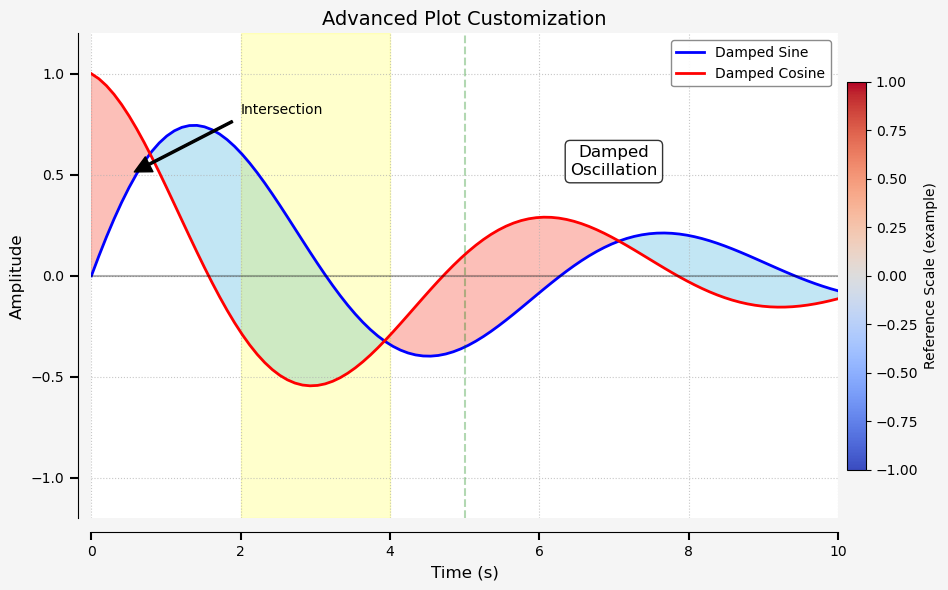

In [12]:
# Create a more advanced visualization using object methods
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#f5f5f5')

# Create some data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) * np.exp(-0.2*x)
y2 = np.cos(x) * np.exp(-0.2*x)

# Plot the data with custom styles
ax.plot(x, y1, 'b-', linewidth=2, label='Damped Sine')
ax.plot(x, y2, 'r-', linewidth=2, label='Damped Cosine')

# Fill between curves
ax.fill_between(x, y1, y2, where=(y1 > y2), color='skyblue', alpha=0.5, interpolate=True)
ax.fill_between(x, y1, y2, where=(y1 <= y2), color='salmon', alpha=0.5, interpolate=True)

# Add a horizontal line at y=0
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Add a vertical line at x=5
ax.axvline(x=5, color='green', linestyle='--', alpha=0.3)

# Highlight a region of interest
ax.axvspan(2, 4, alpha=0.2, color='yellow')

# Add annotations
ax.annotate('Intersection', xy=(0.5, 0.5), xytext=(2, 0.8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Add explanatory text
ax.text(7, 0.5, 'Damped\nOscillation', fontsize=12, ha='center',
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Customize the plot appearance
ax.set_title('Advanced Plot Customization', fontsize=14)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)

# Customize the grid
ax.grid(True, linestyle=':', alpha=0.7)

# Customize the axes spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

# Customize the tick parameters
ax.tick_params(axis='both', which='major', labelsize=10, direction='out', length=6, width=1.5)

# Add a legend with custom styling
ax.legend(loc='upper right', frameon=True, framealpha=0.9, 
          facecolor='white', edgecolor='gray', fontsize=10)

# Add a color bar for visual reference (unrelated to the data, just for demonstration)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(-1, 1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.01, shrink=0.8)
cbar.set_label('Reference Scale (example)', fontsize=10)

# Adjust the layout
fig.tight_layout()
plt.show()

### Adding Artists Directly to Axes

The object-oriented interface allows you to add custom graphical elements (called "artists") directly to the axes or figure.

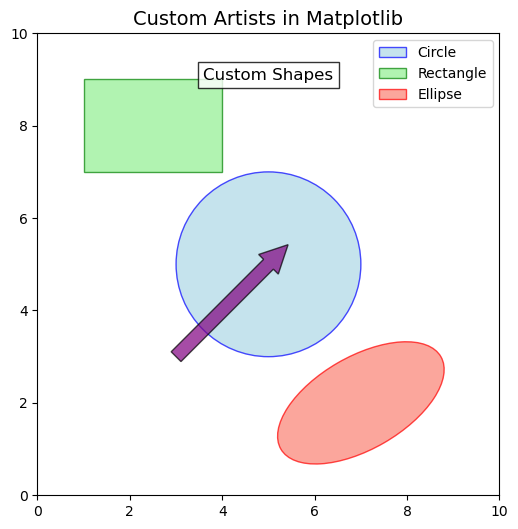

In [13]:
# Create a figure with custom artists
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title('Custom Artists in Matplotlib', fontsize=14)
ax.set_aspect('equal')  # Equal aspect ratio

# Add a circle
circle = patches.Circle((5, 5), radius=2, facecolor='lightblue', 
                        edgecolor='blue', alpha=0.7, label='Circle')
ax.add_patch(circle)

# Add a rectangle
rectangle = patches.Rectangle((1, 7), 3, 2, facecolor='lightgreen',
                             edgecolor='green', alpha=0.7, label='Rectangle')
ax.add_patch(rectangle)

# Add an ellipse
ellipse = patches.Ellipse((7, 2), 4, 2, angle=30, facecolor='salmon',
                         edgecolor='red', alpha=0.7, label='Ellipse')
ax.add_patch(ellipse)

# Add an arrow
arrow = patches.FancyArrow(3, 3, 2, 2, width=0.3, head_width=0.6, 
                          head_length=0.6, facecolor='purple', alpha=0.7)
ax.add_patch(arrow)

# Add text
ax.text(5, 9, 'Custom Shapes', fontsize=12, ha='center', 
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

# Add a legend
ax.legend(loc='upper right')

plt.show()

## 5. Comparison with pyplot and When to Use Each Approach

Let's summarize the key differences between the pyplot and object-oriented interfaces, and provide guidance on when to use each approach.


### Comparing the Two Interfaces

| Feature | pyplot Interface | Object-Oriented Interface |
|---------|-----------------|---------------------------|
| State management | Implicit (global state) | Explicit (direct object references) |
| Learning curve | Easier for beginners | Steeper but more rewarding |
| Code verbosity | More concise | More verbose |
| Multiple figures/axes | Can be confusing | Natural and clear |
| Memory management | Requires manual cleanup | More explicit control |
| Customization | Good | Excellent |
| Use in functions/loops | Problematic without cleanup | Well-suited |
| Integration with applications | Limited | Excellent |


### When to Use Each Approach

**Use pyplot when:**
- Creating quick, exploratory visualizations
- Working in interactive environments like Jupyter notebooks
- Learning Matplotlib for the first time
- Creating simple plots with minimal customization

**Use the object-oriented interface when:**
- Building complex visualizations with multiple subplots
- Creating custom layouts or specialized plots
- Embedding plots in applications (GUIs, web apps)
- Writing reusable plotting functions or classes
- Working with plots in loops or functions
- Requiring precise control over figure elements

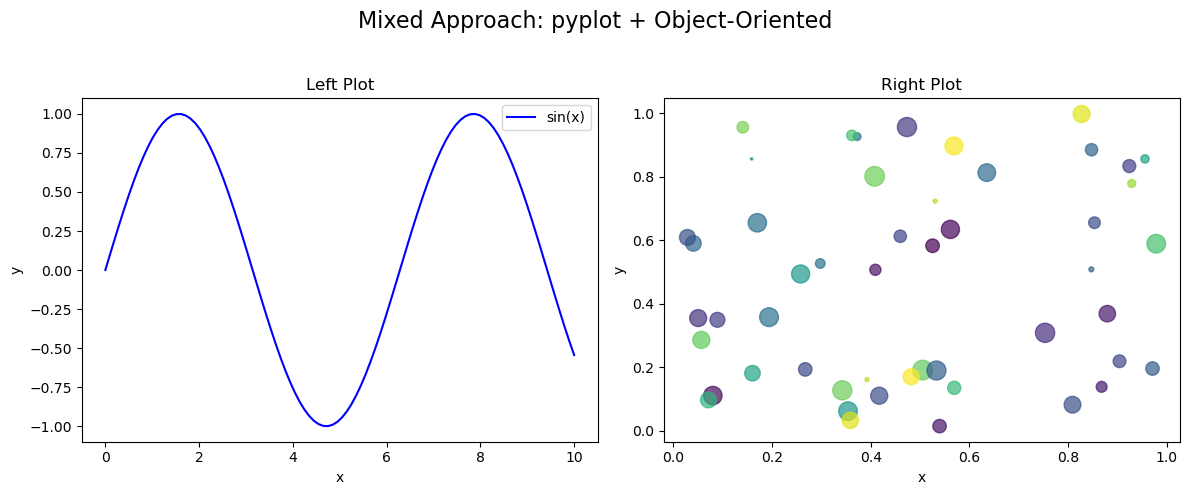

In [14]:
# Demonstrate a practical mixed approach
# (This is often the most pragmatic solution)

# Create figure and axes objects with plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create plots using the object-oriented interface
ax1.plot(x, np.sin(x), 'b-', label='sin(x)')
ax1.set_title('Left Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()

ax2.scatter(np.random.rand(50), np.random.rand(50), 
            c=np.random.rand(50), cmap='viridis', 
            s=np.random.rand(50)*200, alpha=0.7)
ax2.set_title('Right Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Use pyplot for figure-level operations
plt.suptitle('Mixed Approach: pyplot + Object-Oriented', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Best Practices for the Object-Oriented Approach

1. **Always use explicit references** to Figure and Axes objects
2. **Prefer `plt.subplots()`** over individual Figure/Axes creation for most cases
3. **Save figures** using the Figure method: `fig.savefig()` rather than `plt.savefig()`
4. **Use method chaining** when appropriate to make code more concise
5. **Create helper functions** for commonly used plot types in your projects

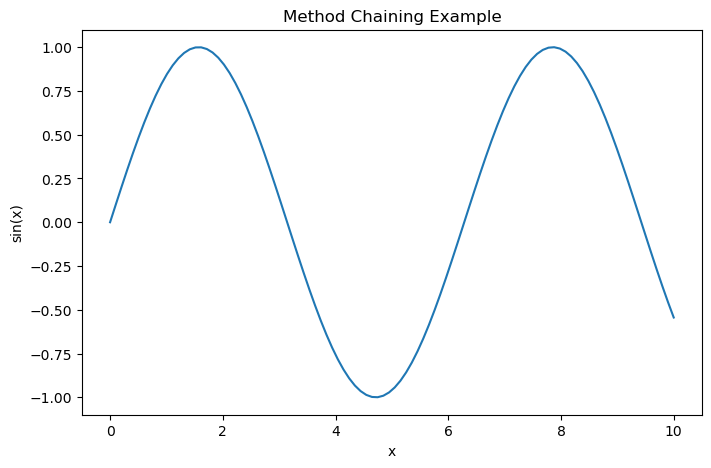

In [16]:
# Demonstration of method chaining for concise code
fig, ax = plt.subplots(figsize=(8, 5))

# Method chaining for concise code
# (ax.plot(x, np.sin(x))
#    .set_title('Method Chaining Example')
#    .set_xlabel('x')
#    .set_ylabel('sin(x)'))

# Note: Not all methods return the axes object, so method chaining isn't always possible
# The above is equivalent to:
ax.plot(x, np.sin(x))
ax.set_title('Method Chaining Example')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

plt.show()

## Summary

In this notebook, we've explored Matplotlib's object-oriented interface:

- We learned about **Figure and Axes objects** and their core methods
- We explored different ways to **create and manage subplots**
- We demonstrated **advanced customization techniques** using object methods
- We compared the **object-oriented approach with pyplot** and discussed when to use each

The object-oriented interface provides greater flexibility and control, making it the preferred approach for complex visualizations and production-ready code. However, a mixed approach—using pyplot for figure creation and the object-oriented interface for customization—is often the most practical solution.

In the next notebook, we'll explore specific plot types and customization techniques in more detail.